**If you add several normally distributed random numbers, the result is normally distributed, where the mean of the sum is the sum of the individual means, and the variance of the sum is the sum of the individual variances. (Remember that variance is the square of standard deviation.) This is a difficult result to prove mathematically, but it is easy to demonstrate with simulation. To do so, run a simulation where you add three normally distributed random numbers, each with mean 100 and standard deviation 10. Your single output variable should be the sum of these three numbers. Verify with @RISK that the distribution of this output is approximately normal with mean 300 and variance 300 (hence, standard
deviation !300 = 17.32).**

Expected Mean: 300, Sample Mean: 299.9740147959678
Expected Std Dev: 17.320508075688775, Sample Std Dev: 17.340447856802008


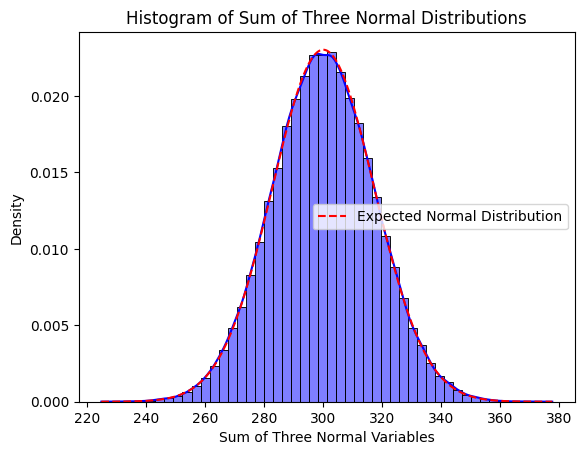

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
mean_individual = 100
std_dev_individual = 10
num_samples = 100000

# Simulate the sum of three normal distributions
samples = (
    np.random.normal(mean_individual, std_dev_individual, num_samples) +
    np.random.normal(mean_individual, std_dev_individual, num_samples) +
    np.random.normal(mean_individual, std_dev_individual, num_samples)
)

# Expected values
expected_mean = 3 * mean_individual  # 300
expected_variance = 3 * (std_dev_individual ** 2)  # 300
expected_std_dev = np.sqrt(expected_variance)  # 17.32

# Compute sample statistics
sample_mean = np.mean(samples)
sample_std_dev = np.std(samples, ddof=1)

# Print results
print(f"Expected Mean: {expected_mean}, Sample Mean: {sample_mean}")
print(f"Expected Std Dev: {expected_std_dev}, Sample Std Dev: {sample_std_dev}")

# Plot the distribution
sns.histplot(samples, bins=50, kde=True, color='blue', stat='density')
x = np.linspace(min(samples), max(samples), 1000)
y = (1 / (expected_std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - expected_mean) / expected_std_dev) ** 2)
plt.plot(x, y, color='red', linestyle='dashed', label='Expected Normal Distribution')
plt.xlabel('Sum of Three Normal Variables')
plt.ylabel('Density')
plt.title('Histogram of Sum of Three Normal Distributions')
plt.legend()
plt.show()